In [20]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
#Read in dataset
df = pd.read_csv('C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/NYCTaxiFares.csv')

In [22]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [23]:
#1 we could use some feature engineering to grab the pickup_datetime (timestamp)
#2 fare_amount = the actual dollar amount that was spent on the fare
#later on this will be treated as classification problem (below or above a certain amount)
#for part 1, the fare_class will be ignored, coz right now, this is treated as regression problem

#main features = pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude,passenger_count


In [24]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [25]:
#raw data in lang and long is too small in differences, thus not that efficient when being used
#use features to interpret it better--calculate the distance traveled from gps coordinate
#HAVERSINE Formula

#take in df=datapoint and 2 samples of lat and long
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d #d is a series that contains the km of distance of those routes

In [26]:
#create a new column 
#calling lat and long in dataframe, so they must be string that matches up with column names
df['dist_km']= haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [27]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [28]:
#use this to see columns and apply to above fn
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km'],
      dtype='object')

In [29]:
#take a look at our dataframe right now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [30]:
#the pickup_datetime is an object treated as string
#convert them into datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
#this will take some time (120 000 data)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null datetime64[ns, UTC]
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [32]:
#notice that the pickup_datetime has become datetime64
#the pickup_datetime is no longer in string, its in datetime
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [33]:
my_time = df['pickup_datetime'][0] #select specific pickup_datetime 

In [34]:
my_time.hour

8

In [35]:
#notice that the time is UTC while the data is actually in NYC
#that means there's 4 hours differences coz this data falls in April 2010
#coz this occured during the Daylight saving time

df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [36]:
#based on that knowledge, create a new column
#EDT = Eastern time, 
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [37]:
df['Hour'] =  df['EDTdate'].dt.hour

In [38]:
#from the dataset pattern, we could determine this by checking whether hours >12
df['AMorPM'] = np.where(df['Hour']<12,'am','pm') #if hour<12 =true, it is am, else its pm


In [39]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [40]:
#check weekday or weekend
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [41]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [42]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [43]:
#categorical and continuous features
#separate them 1st
#create 2 variables
cat_cols = ['Hour','AMorPM','Weekday']
#hour (numerical)could be cintinuous or categorical
#depends on the developer insight
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km'] #check df.columns

In [44]:
#labels under y columns
y_col = ['fare_amount'] #regression problem = fare_amound, if classification - 'fare_class'


In [45]:
#use pandas to deal categories
#pandas offers category datatype for converting categorical values to numerical codes
#lots of other ways to encode these into numerical
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [46]:
#convert Hour datatype into category
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [47]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [48]:
#Hour, AMorPM and Weekday are category now
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [49]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [50]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [51]:
#notice that they are now smart enough to understand the categories (object, etc)


In [52]:
#explore categorical encode
#grab AMorPM series
df['AMorPM']

0         am
1         am
2         am
3         pm
4         pm
5         am
6         pm
7         am
8         am
9         pm
10        pm
11        pm
12        am
13        pm
14        am
15        pm
16        pm
17        am
18        pm
19        pm
20        am
21        am
22        am
23        pm
24        am
25        am
26        pm
27        pm
28        pm
29        pm
          ..
119970    am
119971    pm
119972    am
119973    pm
119974    am
119975    pm
119976    pm
119977    am
119978    pm
119979    am
119980    am
119981    am
119982    pm
119983    pm
119984    pm
119985    pm
119986    pm
119987    am
119988    am
119989    pm
119990    am
119991    pm
119992    am
119993    am
119994    pm
119995    am
119996    am
119997    pm
119998    am
119999    pm
Name: AMorPM, Length: 120000, dtype: category
Categories (2, object): [am, pm]

In [53]:
#grab categories only
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [54]:
#the AM and PM actually has their own code, AM=0, PM=1
df['AMorPM'].cat.codes

0         0
1         0
2         0
3         1
4         1
5         0
6         1
7         0
8         0
9         1
10        1
11        1
12        0
13        1
14        0
15        1
16        1
17        0
18        1
19        1
20        0
21        0
22        0
23        1
24        0
25        0
26        1
27        1
28        1
29        1
         ..
119970    0
119971    1
119972    0
119973    1
119974    0
119975    1
119976    1
119977    0
119978    1
119979    0
119980    0
119981    0
119982    1
119983    1
119984    1
119985    1
119986    1
119987    0
119988    0
119989    1
119990    0
119991    1
119992    0
119993    0
119994    1
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8

In [55]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [56]:
df['Weekday'].cat.codes

0         1
1         2
2         2
3         3
4         0
5         4
6         0
7         4
8         5
9         0
10        4
11        4
12        0
13        2
14        6
15        5
16        4
17        4
18        6
19        5
20        5
21        1
22        5
23        5
24        6
25        2
26        3
27        4
28        0
29        5
         ..
119970    3
119971    4
119972    0
119973    2
119974    2
119975    5
119976    5
119977    5
119978    3
119979    6
119980    6
119981    4
119982    6
119983    6
119984    0
119985    1
119986    0
119987    1
119988    3
119989    2
119990    3
119991    1
119992    0
119993    1
119994    3
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [57]:
#reports ack numpy array
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [58]:
#remember, when parsing tensor, we need numpy array format, then cast into pytorch tensor
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [59]:
#these are now only a large flat array
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [60]:
#stack them together so they are in the same format as they originally were & as the actual datafrake

#specify axis, column: axis = 1
cats = np.stack([hr,ampm,wkdy],axis=1)

In [61]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [62]:
#OR all of these can be simplified into 1 line of function 
#df[col]=grab every column in categorical column,np.stack=stack them together
#this is easier since can be manipulated by changing the var cat_cols
#cats = np.stack([df[col].cat.codes.values for col in cat_cols],1)

In [63]:
#convert the numpy array into tensor
cats = torch.tensor(cats,dtype=torch.int64)

In [64]:
#do the same steps for continuous var
conts = np.stack([df[col].values for col in cont_cols],1)

In [65]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [66]:
#transform the numpy array into tensor
conts = torch.tensor(conts,dtype=torch.float)

In [67]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [68]:
#both category and continuous are converted into tensor
#now we need to convert the label into tensor
torch.tensor(df[y_col].values, dtype=torch.float)

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [69]:
#to confirm the program keep the column shape, use reshape(-1,1)
#especially for older tensr version
torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [70]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)

In [71]:
cats.shape

torch.Size([120000, 3])

In [72]:
#we have 120000 points with 3 categorical columns

In [73]:
conts.shape

torch.Size([120000, 6])

In [74]:
#for continuous: 120000 records for 6 continuous features

In [75]:
y.shape

torch.Size([120000, 1])

In [76]:
#same records with 1 y label per row

In [77]:
#the last thing to do is to set embedding size for categorical columns
#we are using embedding layers used with pytorch
# = hard encoding of the categories

#grab the category size
cat_szs = [len(df[col].cat.categories)for col in cat_cols]


In [78]:
cat_szs

[24, 2, 7]

In [79]:
#24 hour in a day, 2 = AM/PM, 7 = days in a week


In [80]:
#set embedding sized according to categories
#formula = divide entry per unit column by 2

# for size in cat_szs (the number 24,2,7), will take 50 or divided by 2 depending on the actual value
# // to ensure we didn't get float, size+1 = just in case we only have 2 categories
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

In [81]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [82]:
#since none exceed 50, we have the halves 12,1,4

In [83]:
#PART 3


In [84]:
#lets take slices of cats data
#recall that these are categorical data
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [85]:
#define catz as slices
#catz = cats[:4]
catz = cats[:2]

In [86]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [87]:
#lets see what happen when we pass this into an embedding layer
#take the num of embedding and dimension
[nn.Embedding(ni,nf) for ni,nf in emb_szs]

[Embedding(24, 12), Embedding(2, 1), Embedding(7, 4)]

In [88]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [89]:
#the data had breakdown, so its not that confusing
#0- 24h
#1- AM/PM
#2-weekdays
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [90]:
#FORWARD METHOD (cats)
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append((e(catz[:,i])))

In [91]:
embeddingz

[tensor([[-1.0192,  0.8945, -1.0197,  0.3946,  0.7869, -1.6722,  0.8057, -0.6190,
           0.2100,  0.0762, -0.3511, -1.6167],
         [-0.2390, -0.4880,  0.0289, -1.9016,  0.1813,  0.3568,  0.8449, -2.0784,
           0.1124, -0.0688, -0.9303, -1.4585]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.3249],
         [-0.3249]], grad_fn=<EmbeddingBackward>),
 tensor([[-2.1302, -1.2861, -0.5990, -0.9035],
         [-0.9673,  0.9602,  0.2851, -0.2295]], grad_fn=<EmbeddingBackward>)]

In [92]:
#there are 24 items int the 1st tensor
# 2 items in 2nd tensor
# 8 items in 3rd tensor
#those are the actual embedding, it's now givng values to the one hot encoding when we set the embedding table


In [93]:
#assign values to z, and concat
z = torch.cat(embeddingz,1)

In [94]:
z

tensor([[-1.0192,  0.8945, -1.0197,  0.3946,  0.7869, -1.6722,  0.8057, -0.6190,
          0.2100,  0.0762, -0.3511, -1.6167, -0.3249, -2.1302, -1.2861, -0.5990,
         -0.9035],
        [-0.2390, -0.4880,  0.0289, -1.9016,  0.1813,  0.3568,  0.8449, -2.0784,
          0.1124, -0.0688, -0.9303, -1.4585, -0.3249, -0.9673,  0.9602,  0.2851,
         -0.2295]], grad_fn=<CatBackward>)

In [95]:
#pass through dropout layer
#create a dropout layer
#this layer, during training, it will randomized 0 some of the input tensor with probability we provide
#this will auto turned off at 40% probability. This will avoid overfitting.
selfembdrop = nn.Dropout(0.4)

In [96]:
z = selfembdrop(z)

In [97]:
#now we have categorical embeddings being passed to the layer
z

tensor([[-0.0000,  0.0000, -1.6996,  0.6576,  1.3116, -2.7870,  0.0000, -1.0317,
          0.3499,  0.0000, -0.0000, -2.6946, -0.5414, -0.0000, -0.0000, -0.0000,
         -1.5059],
        [-0.3983, -0.8133,  0.0000, -3.1694,  0.3022,  0.5947,  1.4082, -0.0000,
          0.0000, -0.0000, -1.5504, -2.4309, -0.0000, -0.0000,  1.6003,  0.0000,
         -0.3826]], grad_fn=<MulBackward0>)

In [98]:
#RECALL
#we have embedding sizeslist of tuples emb_szs
#(24, 12),  we have the num of categories & size of embedding
# the size dimension of embedding follows the rule: min(50,(size+1)//2)
#max at 50, & divided by 2, use // to ensure the num are int

#then we build list of embedding layers, where each embedding layers correspond to the categories
#0- 24h
#1- AM/PM
#2-weekdays

#during the forward method, we end up applying values to each of those one hot encoding
#until eventually we start to put strength to a certain point of the categorical data
#maybe hour num 12 of the day--lunch hour OR PM coz its expensive, OR last 2 weekday(sat & sun)

#we sticked them all into 1 tensor
#applied Drop layer

In [99]:
#now we need to create class for tabular model
#this is complex model but its flexible
#we can manipulate the numbers in the layer, eg: Layers = [200,100,50]
class TabularModel(nn.Module):
    
    def __init__(self,emd_szs,n_cont,out_sz,layers,p=0.5):
        
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        #p -- can be defined (50% would be a good to start with)
        self.emb_drop = nn.Dropout(p)
        #normalize the continuous data, make sure they fall in the same magnitude
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_embs = sum([nf for ni,nf in emb_szs]) #number of total embedding layer
        n_in = n_embs + n_cont
        
        #set layer
        for i in layers:
            #create a linear layer 
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        
        #last value inside layer
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        self.layers = nn.Sequential(*layerlist)
            
        
    def forward(self,x_cat,x_cont):
        embeddings = []
        
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
            
        x = torch.cat(embeddings,1)
        x= self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [100]:
#PART 4

In [101]:
torch.manual_seed(33)
#continuous features -- output regression=1 (coz we r predicting decimal value)
# for layers--we can define 
model = TabularModel(emb_szs, conts.shape[1],1,[200,100],p=0.4)

In [102]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [103]:
#define criterion of optimizer
#MSELoss -- Mean Square Loss
#np.sqrt(MSE) --> RMSE
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001) #lr--learning rate--try & error to get optimum


In [104]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [105]:
#DATA ARE SHUFFLED ALREADY!! that's y we r able to do it this way
#categorical train & test
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]

#continuous train & test
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]


In [106]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [107]:
len(cat_train)

48000

In [108]:
len(con_train)

48000

In [109]:
len(cat_test)

12000

In [110]:
import time

start_time = time.time()

epochs = 300

losses = [] #keep tracks of losses

for i in range(epochs):
    i += 1
    
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred,y_train)) #RMSE
    losses.append(loss)
    
    #print the loss of very 1st epoch
    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')
        
    #backpropagation optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#calculate time
duration = time.time() - start_time
#print(f'Training tool {duration} second')
print(f'Training took {duration/60} minutes')


    

epoch: 1 loss is 12.500558853149414
epoch: 11 loss is 12.160984992980957
epoch: 21 loss is 11.738170623779297
epoch: 31 loss is 11.323526382446289
epoch: 41 loss is 10.903594970703125
epoch: 51 loss is 10.480284690856934
epoch: 61 loss is 10.078514099121094
epoch: 71 loss is 9.706099510192871
epoch: 81 loss is 9.366927146911621
epoch: 91 loss is 9.055989265441895
epoch: 101 loss is 8.731250762939453
epoch: 111 loss is 8.3931245803833
epoch: 121 loss is 8.016782760620117
epoch: 131 loss is 7.6094489097595215
epoch: 141 loss is 7.1871466636657715
epoch: 151 loss is 6.718172073364258
epoch: 161 loss is 6.239389896392822
epoch: 171 loss is 5.744295597076416
epoch: 181 loss is 5.25827693939209
epoch: 191 loss is 4.800881862640381
epoch: 201 loss is 4.361302852630615
epoch: 211 loss is 4.014430046081543
epoch: 221 loss is 3.7611608505249023
epoch: 231 loss is 3.619093418121338
epoch: 241 loss is 3.524198055267334
epoch: 251 loss is 3.493269205093384
epoch: 261 loss is 3.4458730220794678
epoc

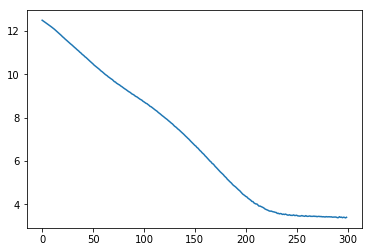

In [111]:
#plot the loss fn
plt.plot(range(epochs),losses)

In [112]:
#converged around 3.4

In [113]:
#validate on test set
with torch.no_grad(): #won't be messing with weight & biases, hence no_grad()
    #get predicted y value from the model by passing in category test data & continuous test data
    y_val = model(cat_test,con_test)
    
    #calculate the loss
    loss = torch.sqrt(criterion(y_val,y_test))

In [114]:
loss 
#there's improvement beyond 3.38 (9 more epoch after 291th)

tensor(3.3224)

In [115]:
#print out predicted value aganis actual values
for i in range(10):
    
    print(f'{i}.) PREDICTED: {y_val[i]}')

0.) PREDICTED: tensor([3.6699])
1.) PREDICTED: tensor([25.6721])
2.) PREDICTED: tensor([6.2900])
3.) PREDICTED: tensor([13.3448])
4.) PREDICTED: tensor([4.7232])
5.) PREDICTED: tensor([5.4614])
6.) PREDICTED: tensor([4.2505])
7.) PREDICTED: tensor([17.5475])
8.) PREDICTED: tensor([7.1971])
9.) PREDICTED: tensor([11.4546])


In [117]:
#do some formating
for i in range(10):
    #calc differences
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i}.) PREDICTED: {y_val[i].item():8.2f} TRUE: {y_test[i].item():8.2f}  DIFF: {diff:8.2f}')

0.) PREDICTED:     3.67 TRUE:     2.90  DIFF:     0.77
1.) PREDICTED:    25.67 TRUE:     5.70  DIFF:    19.97
2.) PREDICTED:     6.29 TRUE:     7.70  DIFF:     1.41
3.) PREDICTED:    13.34 TRUE:    12.50  DIFF:     0.84
4.) PREDICTED:     4.72 TRUE:     4.10  DIFF:     0.62
5.) PREDICTED:     5.46 TRUE:     5.30  DIFF:     0.16
6.) PREDICTED:     4.25 TRUE:     3.70  DIFF:     0.55
7.) PREDICTED:    17.55 TRUE:    14.50  DIFF:     3.05
8.) PREDICTED:     7.20 TRUE:     5.70  DIFF:     1.50
9.) PREDICTED:    11.45 TRUE:    10.10  DIFF:     1.35


In [119]:
#save this model
torch.save(model.state_dict(),'TaxiModel.pt')